# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [441]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_raw_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
mouse_raw_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [442]:
# Checking the number of mice.
mouse_uniques = mouse_raw_df['Mouse ID'].unique()
mouse_total = len(mouse_raw_df['Mouse ID'])
print(f' Mouse Uniques: {len(mouse_uniques)} Total Mouse IDs: {mouse_total}')

 Mouse Uniques: 249 Total Mouse IDs: 1893


In [443]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_clean_df = mouse_raw_df.drop_duplicates(subset=['Mouse ID' , 'Timepoint'], keep = 'last')
mouse_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [444]:
#Function to check lengths of columns
def check_length(col1,col2):
    print(f'df_1 \n{col1.name} length : {len(col1)}')
    print(f'df_2 \n{col2.name} length: {len(col2)}')
check_length(mouse_clean_df['Mouse ID'],mouse_raw_df['Mouse ID'])


df_1 
Mouse ID length : 1888
df_2 
Mouse ID length: 1893


In [445]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_id_gb = mouse_clean_df.groupby(['Mouse ID'], as_index=True)
mouse_id_gb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
by_mouse_clean_df = mouse_clean_df.drop_duplicates(['Mouse ID'], keep='first', ignore_index=True)
by_mouse_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0


In [446]:
# Checking the number of mice in the clean DataFrame.
print(len(by_mouse_clean_df))
uniq = by_mouse_clean_df['Mouse ID'].unique()
print(len(uniq))

249
249


## Summary Statistics

In [447]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gb1 = mouse_clean_df.groupby(['Drug Regimen'])
regimen_gb = mouse_clean_df.groupby(['Drug Regimen'], as_index=True) ['Tumor Volume (mm3)'].mean()
regimen_summary = regimen_gb.reset_index()

regimen_med =  mouse_clean_df.groupby(['Drug Regimen'], as_index=True) ['Tumor Volume (mm3)'].median()
regimen_var =  mouse_clean_df.groupby(['Drug Regimen'], as_index=True) ['Tumor Volume (mm3)'].var()
regimen_std =  mouse_clean_df.groupby(['Drug Regimen'], as_index=True) ['Tumor Volume (mm3)'].std()
regimen_sem =  mouse_clean_df.groupby(['Drug Regimen'], as_index=True) ['Tumor Volume (mm3)'].sem()

regimen_summary = regimen_summary.join(regimen_med, how='left', lsuffix= ' Mean', rsuffix=' Median', on=['Drug Regimen'])
regimen_summary = regimen_summary.join(regimen_var, how='left', on=['Drug Regimen'])
regimen_summary = regimen_summary.join(regimen_std, how='left', lsuffix= ' Variance', rsuffix=' Std Dev', on=['Drug Regimen'])
regimen_summary = regimen_summary.join(regimen_sem, how='left', on=['Drug Regimen'])
regimen_summary.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume (mm3) SEM'}, inplace=True)
regimen_summary.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Drug Regimen,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [448]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summ_stat = regimen_gb1[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
summ_stat.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

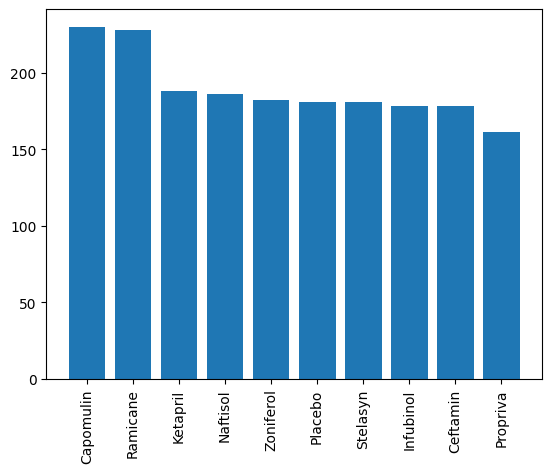

In [449]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#drug_counts_gb = mouse_raw_df.groupby(['Drug Regimen']) ['Drug Regimen'].value_counts()
drug_counts = mouse_raw_df['Drug Regimen'].agg('value_counts').rename('Counts').reset_index()
drug_counts_df = pd.DataFrame(drug_counts)


plt.bar(drug_counts['Drug Regimen'], drug_counts['Counts'])
plt.xticks(rotation=90)
plt.show()


Text(0.5, 1.0, 'Gender Counts')

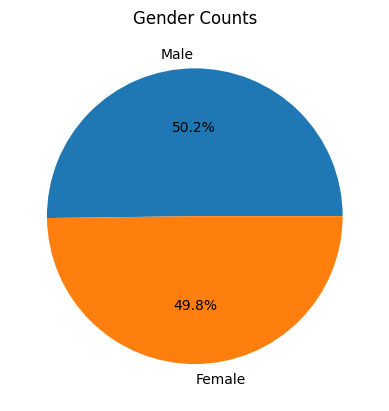

In [450]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_gender = mouse_metadata['Sex'].agg('value_counts').rename('Counts').reset_index()
mouse_gender

# Make the pie chart
plt.pie(mouse_gender['Counts'], labels=['Male','Female'], autopct='%1.1f%%',)
plt.title('Gender Counts')


## Quartiles, Outliers and Boxplots

In [451]:
#here
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capo_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Capomulin']
ram_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ramicane']
infu_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Infubinol']
ceft_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = mouse_clean_df.drop_duplicates(['Mouse ID'], keep='last', ignore_index=True)
filtered_tumor_df = final_tumor_df.loc[(final_tumor_df['Drug Regimen'] == 'Capomulin') | (final_tumor_df['Drug Regimen'] == 'Ramicane') |
                                        (final_tumor_df['Drug Regimen'] == 'Infubinol') |  (final_tumor_df['Drug Regimen'] == 'Ceftamin')]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ram_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1
11,n364,Ramicane,Male,4,17,45,31.095335,1
15,c758,Ramicane,Male,9,17,45,33.397653,1
17,a644,Ramicane,Female,7,17,45,32.978522,1
18,i177,Ramicane,Male,10,18,45,33.562402,3


In [452]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = filtered_tumor_df['Drug Regimen'].drop_duplicates()
treatment_list = treatment_list.to_list()
treatment_list = [str(x) for x in treatment_list]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
def find_outlier(drug):
    drug_spec = []
    for x in drug:
        drug_spec = filtered_tumor_df.loc[filtered_tumor_df['Drug Regimen'] == drug]        
    q1 = drug_spec['Tumor Volume (mm3)'].quantile(.25)
    q3 = drug_spec['Tumor Volume (mm3)'].quantile(.75)
    iqr = q3 - q1
    upper_b = q1 + (1.5 * iqr)
    lower_b = q3 - (1.5 * iqr)
    tumor_vol_data = drug_spec.loc[(drug_spec['Tumor Volume (mm3)'] > upper_b) | (drug_spec['Tumor Volume (mm3)'] < lower_b)]
    return drug_spec.loc[(drug_spec['Tumor Volume (mm3)'] > upper_b) | (drug_spec['Tumor Volume (mm3)'] < lower_b)]



    # Locate the rows which contain mice on each drug and get the tumor volumes
    #outliers = find_outlier(name)
    
    # add subset


    # Determine outliers using upper and lower bounds
(outlier1, outlier2, outlier3, outlier4) = [find_outlier(name) for name in treatment_list]
print(f'Outliers: \nRamicane\n{outlier1}\n \nCapomulin\n{outlier2}\n \nInfubinol\n{outlier3}\n \nCeftamin\n{outlier4}')

Outliers: 
Ramicane
   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane  Male          21          16         45   
43     q597     Ramicane  Male          20          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126                 1  
43           45.220869                 2  
 
Capomulin
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
45      i557    Capomulin  Female           1          24         45   
181     r157    Capomulin    Male          22          25         15   

     Tumor Volume (mm3)  Metastatic Sites  
1             23.343598                 1  
2             28.484033                 0  
3             28.430964                 1  
45            47.68596

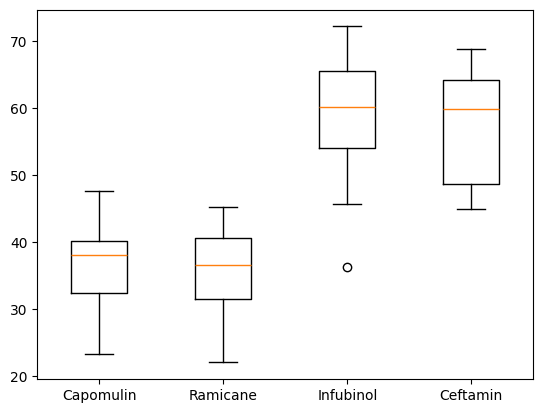

In [453]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot([capo_df['Tumor Volume (mm3)'], ram_df['Tumor Volume (mm3)'], infu_df['Tumor Volume (mm3)'], ceft_df['Tumor Volume (mm3)']])
ax.set_xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()


## Line and Scatter Plots

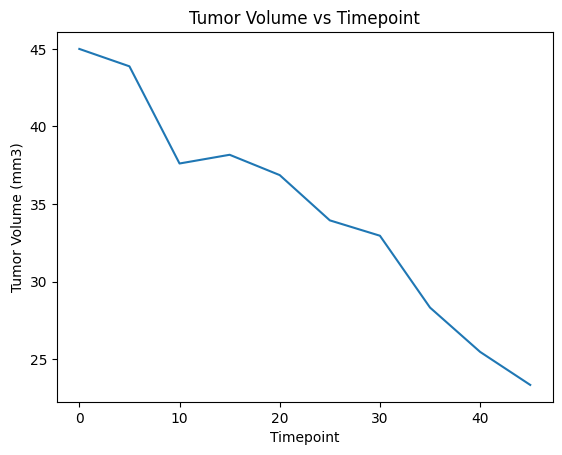

In [454]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_tp = mouse_clean_df.loc[mouse_clean_df['Drug Regimen'] == 'Capomulin']
capo_tp_s185 = capo_tp.loc[capo_tp['Mouse ID'] == 's185'].reset_index()

s185_tum = capo_tp_s185['Tumor Volume (mm3)']
s185_tim = capo_tp_s185['Timepoint']

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint')
plt.plot(s185_tim,s185_tum)


Text(0.5, 1.0, 'Weight vs Tumor Volume (mm3)')

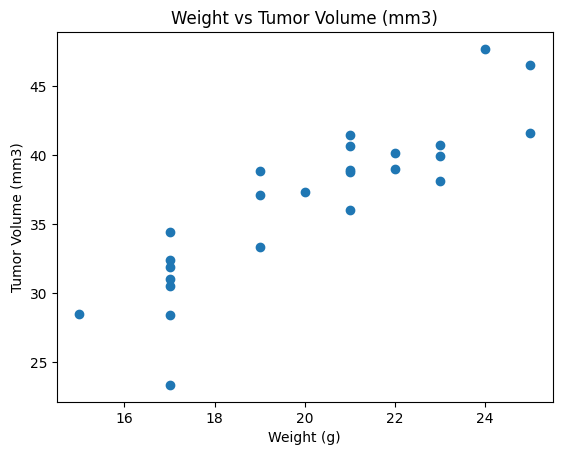

In [455]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_wei = capo_df['Weight (g)']
capo_tum = capo_df['Tumor Volume (mm3)']


plt.scatter(capo_wei, capo_tum)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Tumor Volume (mm3)')

## Correlation and Regression

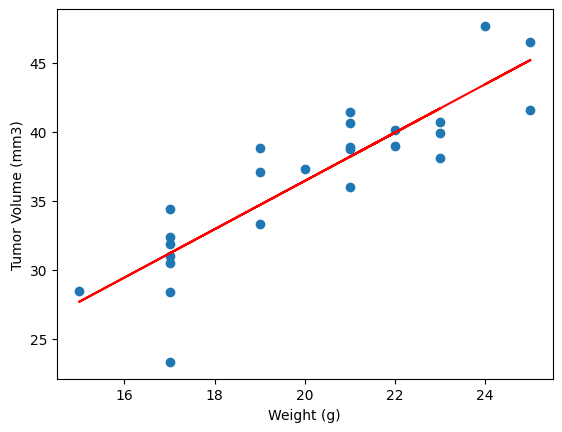

In [456]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
res = st.pearsonr(capo_wei, capo_tum)
(slope, intercept, r, p, std_err) = st.linregress(capo_wei, capo_tum)
reg_val = capo_wei * slope + intercept

plt.scatter(capo_wei, capo_tum)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(capo_wei, reg_val,'r')
plt.show()
